T student distribution

Author: Francisco Javier Sánchez Panduro
Supervised by: Professor Doctor Brenda García Maya
Monterrey Institute of Tecnology and Higher Studies
23 of August 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

A nutritionist is investigated the amount of vitamin C in two types of orange juice. They took random samples of each juice and registered the average levels of vitamin c content in milligrams per 100 ml.

# Data preparation

In [2]:
data = {
    'juice_a': [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23],
    'juice_b': [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]
}
df = pd.DataFrame(data)
df.head()

,juice_a,juice_b
0,20,19
1,25,18
2,22,21
3,23,20
4,28,23


Calculate a confidence interval of 99% for the poblational mean of the content of vitamin C of both juicies

# QQ-Plot
A QQ-Plot is graphed to determine the normality distribution of the data

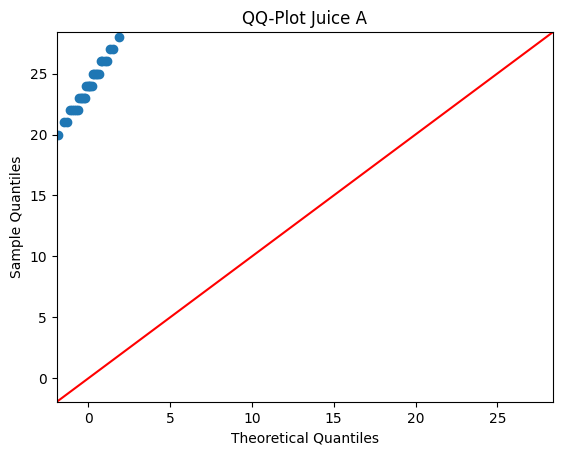

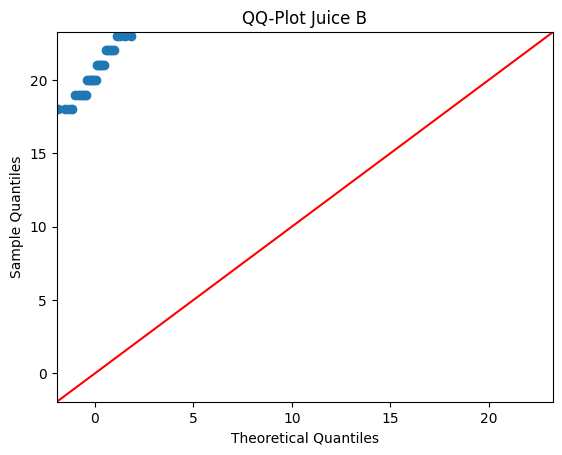

In [3]:
sm.qqplot(df['juice_a'], line ='45')
plt.title('QQ-Plot Juice A')
plt.show()

sm.qqplot(df['juice_b'], line ='45')
plt.title('QQ-Plot Juice B')
plt.show()

This data is graphed against a standard normal distribution, which we can conclude this data does not obey, we must standardize data in order to get a more accurate plot

In [4]:
df['juice_a_std'] = (df['juice_a'] - df['juice_a'].mean()) / df['juice_a'].std()
df['juice_b_std'] = (df['juice_b'] - df['juice_b'].mean()) / df['juice_b'].std()

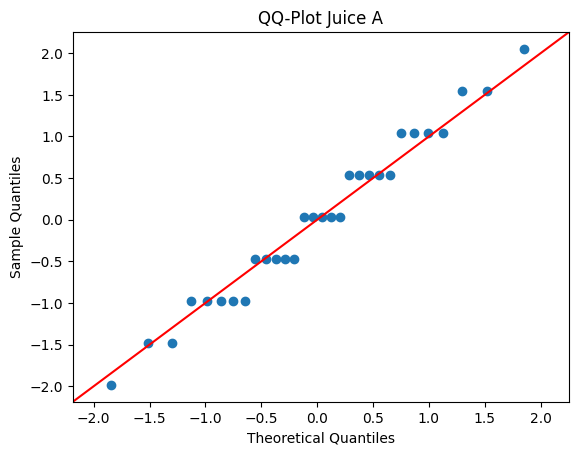

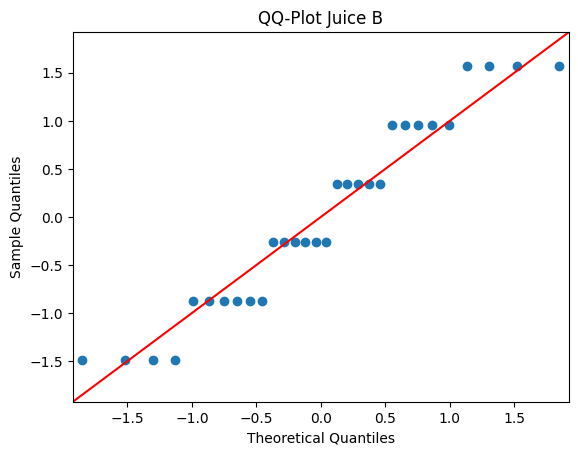

In [5]:
sm.qqplot(df['juice_a_std'], line ='45')
plt.title('QQ-Plot Juice A')
plt.show()

sm.qqplot(df['juice_b_std'], line ='45')
plt.title('QQ-Plot Juice B')
plt.show()

# Kolgmogorov Smirnov test
This test helps understand wether or not the data obeys a standard normal distribution

In [6]:
ks_statistic_A, ks_pvalue_A = stats.kstest(df['juice_a_std'], 'norm')
ks_statistic_B, ks_pvalue_B = stats.kstest(df['juice_b_std'], 'norm')

print(f"Kolmogorov-Smirnov test for Juice A: statistic = {ks_statistic_A}, p-value = {ks_pvalue_A}")
print(f"Kolmogorov-Smirnov test for Juice B: statistic = {ks_statistic_B}, p-value = {ks_pvalue_B}")


Kolmogorov-Smirnov test for Juice A: statistic = 0.11451938044354537, p-value = 0.7847561982514
Kolmogorov-Smirnov test for Juice B: statistic = 0.14323791303933453, p-value = 0.5231390691550495


## Distribution (Normal or t-student)

In [7]:
distribution_A = 'normal' if ks_pvalue_A > 0.01 else 't-student'
distribution_B = 'normal' if ks_pvalue_B > 0.01 else 't-student'

In [8]:
print(distribution_A)
print(distribution_B)

normal
normal


# Calculate the confidence interval according to the data distribution and the confidence level

In [9]:
confidence_level = 0.99
degrees_of_freedom_juice_a = len(df['juice_a_std']) - 1
degrees_of_freedom_juice_b = len(df['juice_b_std']) - 1

ci_juice_a = stats.t.interval(confidence_level, degrees_of_freedom_juice_a, loc=df['juice_a'].mean(), scale=stats.sem(df['juice_a']))
ci_juice_b = stats.t.interval(confidence_level, degrees_of_freedom_juice_b, loc=df['juice_b'].mean(), scale=stats.sem(df['juice_b']))

print(f"99% Confidence interval for Juice A following a {distribution_A} distribution: {ci_juice_a}")
print(f"99% Confidence interval for Juice B following a {distribution_B} distribution: {ci_juice_b}")


99% Confidence interval for Juice A following a normal distribution: (22.936141535685323, 24.930525130981344)
99% Confidence interval for Juice B following a normal distribution: (19.611360740938043, 21.255305925728624)
